# Descriptions and genre

In [146]:
import pandas as pd

youtube = pd.read_csv('youtube-data.csv')

# remove the white space in column names of youtube
youtube.columns = youtube.columns.str.strip()
print(youtube.columns)

# remove the white space from youtube['description']
youtube['description'] = youtube['description'].str.strip()

# for every column in youtube, remove the white space from the values if the value is a string
for column in youtube.columns:
    if youtube[column].dtype == 'object':
        youtube[column] = youtube[column].str.strip()

youtube

Index(['id', 'genre', 'publishedAt', 'title', 'description', 'channelTitle',
       'tags', 'categoryId', 'defaultAudioLanguage', 'duration', 'definition',
       'caption', 'licensedContent', 'viewCount', 'likeCount', 'favoriteCount',
       'commentCount', 'hasPaidProductPlacement', 'topicCategories',
       'defaultLanguage', 'regionRestriction'],
      dtype='object')


,id,genre,publishedAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,...,caption,licensedContent,viewCount,likeCount,favoriteCount,commentCount,hasPaidProductPlacement,topicCategories,defaultLanguage,regionRestriction
0,ILCOJXYW_c4,Slam Poetry,2017-08-10T21:00:03Z,Anna Marie - Lessons in the Mirror,Become a member! Support Button Poetry: http:/...,Button Poetry,"['Slam Poetry', 'Button Poetry', 'poetry slam'...",24,en,PT2M49S,...,false,True,89043,3476,0,50,False,['https://en.wikipedia.org/wiki/Music'],,NaN
1,L3snfamyQ6M,Slam Poetry,2017-08-06T19:00:00Z,Jared Singer - Just Take a Shower,Get Jared's book here: http://bit.ly/jaredforg...,Button Poetry,"['Slam Poetry', 'Button Poetry', 'poetry slam'...",24,en,PT4M13S,...,true,True,792191,36084,0,475,False,['https://en.wikipedia.org/wiki/Music'],,NaN
2,4HhlV4aa8tM,Slam Poetry,2016-04-18T16:00:00Z,The Real Period Poem :: Queen Sheba,"Born in Detroit\, MI\, now living in Atlanta G...",Da Poetry Lounge,"['Slam Poetry', 'Slam Poem', 'Slam Poet', 'Poe...",24,,PT7M58S,...,false,False,121031,5200,0,74,False,['https://en.wikipedia.org/wiki/Music'],,NaN
3,Ckc21Cdblsc,Slam Poetry,2016-05-24T22:55:08Z,Reagan Myers - The Girl Becomes Gasoline,"Get Reagan's book\, AFTERWARDS: http://bit.ly/...",Button Poetry,"['Slam Poetry', 'Button Poetry', 'poetry slam'...",24,en,PT3M28S,...,true,True,1438810,50848,0,279,False,['https://en.wikipedia.org/wiki/Entertainment'],,NaN
4,Lv0VC92oxFQ,Slam Poetry,2016-08-04T20:42:51Z,"LionHeart - ""Pretty Hurts"" | All Def Poetry x ...",→ CONNECT WITH LIONHEART ← https://twitter.com...,All Def Poetry,"['Def Poetry', 'Def Poetry Jam', 'Russell Simm...",24,en-US,PT3M46S,...,false,True,408794,21158,0,253,False,['https://en.wikipedia.org/wiki/Music'],,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,nVBalxt3NEU,Ancient Memes,2008-07-09T04:40:13Z,NEDM Song,,seanthamaster,"['cat', 'coburn', 'this', 'program', 'pie', 'l...",10,,PT5M20S,...,false,False,665661,4632,0,1649,False,['https://en.wikipedia.org/wiki/Electronic_mus...,,NaN
922,T2e1tsnKkiI,Ancient Memes,2012-06-06T15:36:50Z,Beethoven Virus DDR Level Asian,Asian kid dancing to DDR Beethoven Virus. Amaz...,fundistraction,"['ddr', 'Revolution', 'Game', 'asian', 'korea'...",24,,PT1M49S,...,false,False,7372966,124584,0,9230,False,['https://en.wikipedia.org/wiki/Music'],,NaN
923,yU5KXTDCf-0,Ancient Memes,2008-01-02T19:05:15Z,GTA San Andreas Bigfoot + UFO,Get this song for FREE from audioswap: http://...,ScapeTheGoat,"['GTA', 'Grand', 'Theft', 'Auto', 'San', 'Andr...",24,,PT3M51S,...,false,False,4926282,41338,0,6265,False,['https://en.wikipedia.org/wiki/Action-adventu...,,NaN
924,CXerF6crDRs,Ancient Memes,2010-08-08T19:35:56Z,Pizza Kids - We Like Pizza (original version),i couldnt find any of the original so i upload...,spiralcrystal09,"['music', 'pizza']",10,,PT3M7S,...,false,False,1518624,25025,0,,False,"['https://en.wikipedia.org/wiki/Music', 'https...",,NaN


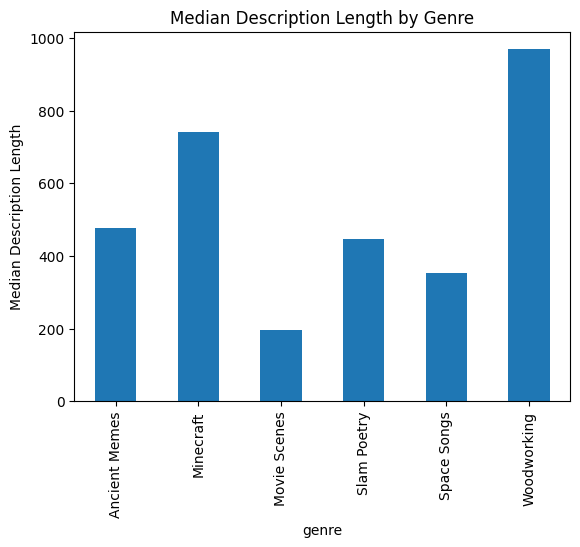

In [147]:
# create a column measuring description length (number of characters)
youtube['description_length'] = youtube['description'].str.len()

# graph the average description length by genre
import matplotlib.pyplot as plt

youtube.groupby('genre')['description_length'].median().plot(kind='bar')
plt.ylabel('Median Description Length')
plt.title('Median Description Length by Genre')
plt.show()


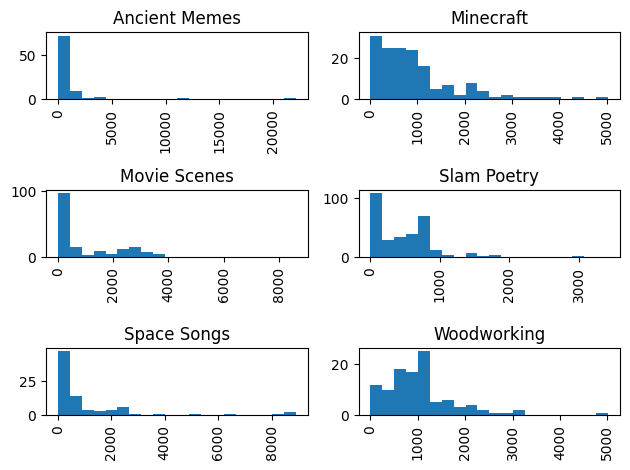

In [148]:
# graph a histogram of description length for every genre
youtube.hist(column='description_length', by='genre', bins=20)
# make sure there is enough space between the subplots
plt.tight_layout()
plt.show()

In [149]:
# print the maximum description length for each genre
print(youtube.groupby('genre')['description_length'].max())
print()

# print the name of the video with the longest description in each genre
for genre in youtube['genre'].unique():
    max_length = youtube[youtube['genre'] == genre]['description_length'].max()
    # print the genre it's from
    print(genre)
    # print the description length
    print("description length: ", max_length)
    # print the title of the video
    print(youtube[(youtube['description_length'] == max_length) & (youtube['genre'] == genre)]['title'])
    print()



genre
Ancient Memes    22077
Minecraft         5034
Movie Scenes      8604
Slam Poetry       3424
Space Songs       8899
Woodworking       5018
Name: description_length, dtype: int64

Slam Poetry
description length:  3424
168    Twoey Gray - "Lolita's Revenge"
Name: title, dtype: object

Minecraft
description length:  5034
367    Minecraft: Bioshock - The City of Rapture Part 1
Name: title, dtype: object

Movie Scenes
description length:  8604
532    Whitney Houston & Brandy - IMPOSSIBLE / IT'S P...
Name: title, dtype: object

Woodworking
description length:  5018
677    34 - Learn How to Make RAISED PANEL DOORS With...
Name: title, dtype: object

Space Songs
description length:  8899
806    The Kinks - Supersonic Rocket Ship
Name: title, dtype: object

Ancient Memes
description length:  22077
859    "Weird Al" Yankovic - Trapped In The Drive-Thr...
Name: title, dtype: object



In [150]:
# print the correlation coefficient for description length and views
print(youtube.groupby('genre')['description_length'].corr(youtube['viewCount']))

genre
Ancient Memes   -0.019658
Minecraft        0.235570
Movie Scenes     0.351774
Slam Poetry      0.229501
Space Songs     -0.018624
Woodworking     -0.087155
Name: description_length, dtype: float64


## Use logistic regression to predict the genre of the video

### Using TF-IDF Vectorization

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(youtube['description'])

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, youtube['genre'], random_state=42)

nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, average='weighted')
recall_tfidf = recall_score(y_test, y_pred_tfidf, average='weighted')
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='weighted')

print(f'TF-IDF Accuracy: {accuracy_tfidf:.2f}')
print(f'TF-IDF Precision: {precision_tfidf:.2f}')
print(f'TF-IDF Recall: {recall_tfidf:.2f}')
print(f'TF-IDF F1-Score: {f1_tfidf:.2f}')

print(X_tfidf)

# Print the words with the highest TF-IDF value for each genre
# tfidf_df = pd.DataFrame(X_tfidf.todense(), columns=tfidf_vectorizer.get_feature_names_out())
# tfidf_df['genre'] = youtube['genre'].values

# for genre in youtube['genre'].unique():
#     print(genre)
#     genre_df = tfidf_df[tfidf_df['genre'] == genre].drop(columns=['genre'])
#     print(genre_df.mean().sort_values(ascending=False).head(10))
#     print()

c:\Users\Moo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TF-IDF Accuracy: 0.71
TF-IDF Precision: 0.72
TF-IDF Recall: 0.71
TF-IDF F1-Score: 0.66
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 47264 stored elements and shape (926, 12966)>
  Coords	Values
  (0, 7372)	0.06839487357856415
  (0, 11092)	0.08916370318467255
  (0, 2218)	0.48158721874707705
  (0, 8769)	0.30454179269163534
  (0, 5742)	0.16076242436189692
  (0, 1851)	0.10464609865241384
  (0, 7070)	0.10906562252762213
  (0, 2222)	0.15546611368466356
  (0, 11009)	0.05595240585888031
  (0, 7916)	0.05808452529112475
  (0, 12166)	0.10483755044312672
  (0, 3271)	0.10886059568579748
  (0, 2223)	0.14037102739692314
  (0, 7529)	0.1466360542611853
  (0, 4708)	0.14037102739692314
  (0, 3746)	0.07049048976009908
  (0, 7553)	0.08580667039485934
  (0, 6928)	0.17342840392681813
  (0, 4482)	0.17251141822044722
  (0, 241)	0.15546611368466356
  (0, 7626)	0.1466360542611853
  (0, 2275)	0.11834078118253646
  (0, 1651)	0.11470274312448236
  (0, 3787)	0.1466360542611853
  (0, 9868)	0.11644588

### Using a Count Vectorizer

In [152]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [153]:
y = youtube['genre']
X = youtube['description']

countvec = CountVectorizer(stop_words='english')

# split the data into training and testing sets with a random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create a pipeline with a count vectorizer and a logistic regression model
pipe = make_pipeline(countvec, LogisticRegression())

# fit the pipeline to the training data
pipe.fit(X_train, y_train)

# predict the genre of the testing data
y_pred = pipe.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

# perform cross-validation on the training set and store the results in a DataFrame
cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)
cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)
print()

# calculate the mean cross-validation score to evaluate model performance
mean_cv_score = cv_results_df['test_score'].mean()
print(f'Mean Cross-Validation Score: {mean_cv_score:.2f}')

               precision    recall  f1-score   support

Ancient Memes       0.75      0.30      0.43        20
    Minecraft       0.76      0.89      0.82        46
 Movie Scenes       0.58      0.88      0.70        42
  Slam Poetry       0.97      0.89      0.93        83
  Space Songs       1.00      0.65      0.79        17
  Woodworking       0.95      0.75      0.84        24

     accuracy                           0.81       232
    macro avg       0.83      0.73      0.75       232
 weighted avg       0.84      0.81      0.80       232

   fit_time  score_time  test_score  train_score
0  2.823232    0.017215    0.791367     0.972973
1  2.577510    0.014559    0.791367     0.974775
2  1.931963    0.012773    0.769784     0.971171
3  2.572163    0.014874    0.784173     0.974775
4  2.984674    0.010768    0.789855     0.976619

Mean Cross-Validation Score: 0.79


In [154]:
# predict probabilities on the test set
y_pred_prob = pipe.predict_proba(X_test)

# print the video with the highest probability for each genre
for genre in youtube['genre'].unique():
    genre_idx = pipe.classes_.tolist().index(genre)
    max_prob_idx = y_pred_prob[:, genre_idx].argmax()
    test_idx = X_test.index[max_prob_idx]
    print(genre)
    print(youtube.iloc[test_idx]['title'])
    print()


Slam Poetry
Edinburgh Festival 2014 performance Loud Poets Miko Berry, Scottish Poetry Slam Champion,150 seconds

Minecraft
♪ "Like An Enderman" - Minecraft Song

Movie Scenes
Rocky (8/10) Movie CLIP - Training Montage (1976) HD

Woodworking
34 - Learn How to Make RAISED PANEL DOORS With solid wood. easy step by step.

Space Songs
Rockets - Galactica (1980, Official Video)

Ancient Memes
Michael Jackson - Smooth Criminal (Official Video)



In [155]:
vec_from_pipe = pipe.named_steps['countvectorizer']
logreg_from_pipe = pipe.named_steps['logisticregression']

# get the feature names from the count vectorizer
feature_names = vec_from_pipe.get_feature_names_out()

# Iterate over each genre
for idx, genre in enumerate(pipe.classes_):
    print(f'Genre: {genre}')
    
    # Get the coefficients for the current genre
    coefficients = logreg_from_pipe.coef_[idx]
    
    # Combine the words with their corresponding coefficients
    word_coefficient = list(zip(feature_names, coefficients))
    
    # Sort the words by their absolute coefficients
    word_coefficient.sort(key=lambda x: abs(x[1]), reverse=True)
    
    # Print the 5 words with the highest absolute coefficients for the current genre
    print('Top 5 words with the highest absolute coefficients:')
    highest_words = word_coefficient[:10]
    for word, coef in highest_words:
        print(f'{word}: {coef:.2f}')
    print()


Genre: Ancient Memes
Top 5 words with the highest absolute coefficients:
funny: 0.87
dancing: 0.78
spartaaaa: 0.74
haha: 0.73
lady: 0.61
yeast: 0.61
enjoyed: 0.59
baby: 0.56
wars: 0.54
00: 0.52

Genre: Minecraft
Top 5 words with the highest absolute coefficients:
vareide: 1.25
dennis: 1.25
minecraft: 1.25
fap: 0.73
victim: 0.72
videos: 0.67
pyramide: 0.63
server: 0.63
just: 0.62
qkzv3m_zwgk: 0.57

Genre: Movie Scenes
Top 5 words with the highest absolute coefficients:
movie: 1.37
scene: 1.35
video: -0.84
scenes: 0.67
poetry: -0.63
film: 0.59
disney: 0.53
tootski: 0.52
speech: 0.50
funny: -0.48

Genre: Slam Poetry
Top 5 words with the highest absolute coefficients:
poetry: 1.78
slam: 1.30
poem: 0.97
def: 0.89
27: 0.70
spoken: 0.69
homemade: 0.67
performs: 0.57
performed: 0.56
2014: 0.56

Genre: Space Songs
Top 5 words with the highest absolute coefficients:
album: 1.13
space: 0.86
moon: 0.86
music: 0.59
2010: 0.58
futuristic: 0.57
sounds: 0.56
song: 0.51
john: 0.49
gravity: 0.49

Genre:

## Predict the genre based on description length

### Decision Tree

In [156]:
# import scikit-learn
from sklearn.model_selection import train_test_split

# train test split
X = youtube['description_length']
y = youtube['genre']

# split the data into training and testing sets with a random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create a pipeline
pipe = make_pipeline(DecisionTreeClassifier())

# fit the pipeline to the training data
pipe.fit(X_train.values.reshape(-1, 1), y_train)

# predict the genre of the testing data
y_pred = pipe.predict(X_test.values.reshape(-1, 1))

# print the classification report
print(classification_report(y_test, y_pred))

# perform cross-validation on the training set and store the results in a DataFrame
cv_results = cross_validate(pipe, X_train.values.reshape(-1, 1), y_train, return_train_score=True)
cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)
print()

# calculate the mean cross-validation score to evaluate model performance
mean_cv_score = cv_results_df['test_score'].mean()
print(f'Mean Cross-Validation Score: {mean_cv_score:.2f}')

               precision    recall  f1-score   support

Ancient Memes       0.04      0.05      0.04        20
    Minecraft       0.31      0.33      0.32        46
 Movie Scenes       0.25      0.33      0.29        42
  Slam Poetry       0.52      0.37      0.43        83
  Space Songs       0.12      0.12      0.12        17
  Woodworking       0.28      0.29      0.29        24

     accuracy                           0.30       232
    macro avg       0.25      0.25      0.25       232
 weighted avg       0.33      0.30      0.31       232

   fit_time  score_time  test_score  train_score
0  0.002777    0.001607    0.309353     0.870270
1  0.002367    0.000883    0.273381     0.864865
2  0.002208    0.000859    0.302158     0.859459
3  0.003882    0.002024    0.330935     0.859459
4  0.002442    0.001271    0.326087     0.859712

Mean Cross-Validation Score: 0.31


Observation/conclusion: description length is not an effective way of predicting genre. The words in the description, however, _are_ pretty good at predicting genre.

# Trends in Comment Sections

## What videos do people tend to leave more comments on?

In [157]:
# CommentCount is supposed to be a float. Drop rows where it is not.
youtube = youtube.dropna(subset=['commentCount'])

# graph the median commentCount by genre
youtube.groupby('genre')['commentCount'].median().plot(kind='bar')
plt.ylabel('Median Comment Count')
plt.title('Median Comment Count by Genre')
plt.show()

# for each genre, print the median commentCount in order of highest to lowest
print("MEDIAN COMMENT COUNT BY GENRE ---------------------------")
print(youtube.groupby('genre')['commentCount'].median().sort_values(ascending=False))
print()

# for each genre, print the video with the highest commentCount
print("VIDEO WITH HIGHEST COMMENT COUNT BY GENRE ---------------")
for genre in youtube['genre'].unique():
    max_commentCount = youtube[youtube['genre'] == genre]['commentCount'].max()
    print(genre)
    print("commentCount: ", max_commentCount)
    # print viewCount
    print("viewCount: ", youtube[(youtube['commentCount'] == max_commentCount) & (youtube['genre'] == genre)]['viewCount'])
    print(youtube[(youtube['commentCount'] == max_commentCount) & (youtube['genre'] == genre)]['title'])
    print()


TypeError: agg function failed [how->median,dtype->object]

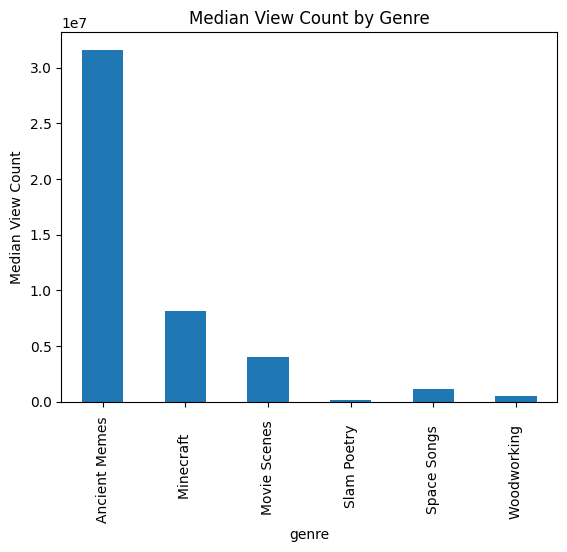

MEDIAN VIEW COUNT BY GENRE ------------------------------
genre
Ancient Memes     31601767.0
Minecraft          8192195.0
Movie Scenes       3985418.0
Space Songs        1139732.0
Woodworking         544931.0
Slam Poetry         146772.0
Name: viewCount, dtype: float64

VIDEO WITH HIGHEST VIEW COUNT BY GENRE ------------------
Slam Poetry   
viewCount:  16495964
commentCount:  141           11018 
Name: commentCount, dtype: object

Minecraft     
viewCount:  336970447
commentCount:  345          172135 
Name: commentCount, dtype: object

Movie Scenes  
viewCount:  1013621001
commentCount:  594          527602 
Name: commentCount, dtype: object

Woodworking   
viewCount:  34564763
commentCount:  749            3819 
Name: commentCount, dtype: object

Space Songs   
viewCount:  4092199768
commentCount:  754          514504 
Name: commentCount, dtype: object

Ancient Memes 
viewCount:  5363493917
commentCount:  852         5402677 
Name: commentCount, dtype: object



In [ ]:
# graph the median viewCount by genre
youtube.groupby('genre')['viewCount'].median().plot(kind='bar')
plt.ylabel('Median View Count')
plt.title('Median View Count by Genre')
plt.show()

# for each genre, print the median viewCount in order of highest to lowest
print("MEDIAN VIEW COUNT BY GENRE ------------------------------")
print(youtube.groupby('genre')['viewCount'].median().sort_values(ascending=False))
print()

# for each genre, print the video with the highest commentCount
print("VIDEO WITH HIGHEST VIEW COUNT BY GENRE ------------------")
for genre in youtube['genre'].unique():
    max_commentCount = youtube[youtube['genre'] == genre]['viewCount'].max()
    print(genre)
    print("viewCount: ", max_commentCount)
    # print commentCount
    print("commentCount: ", youtube[(youtube['viewCount'] == max_commentCount) & (youtube['genre'] == genre)]['commentCount'])
    print()



ValueError: could not convert string to float: '             '

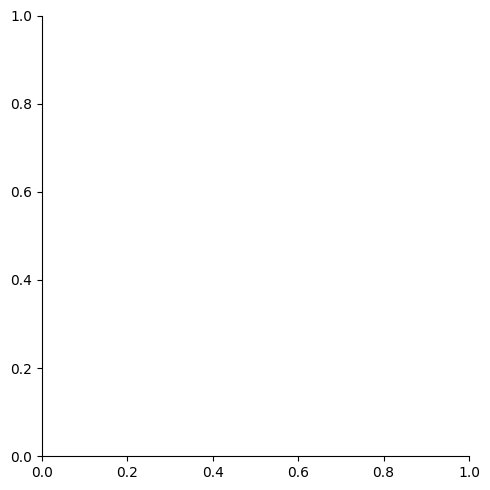

In [ ]:
import seaborn as sns

# for each genre, graph the relationship between commentCount and viewCount
for genre in youtube['genre'].unique():
    # plot the linear regression line
    # make the points smaller
    sns.lmplot(data=youtube[youtube['genre'] == genre], x='commentCount', y='viewCount', scatter_kws={'s': 5})
    plt.title(genre)
    plt.show()


In [ ]:
# for each genre, print the correlation coefficient between commentCount and viewCount in order of highest to lowest
print("CORRELATION COEFFICIENT BETWEEN COMMENT COUNT AND VIEW COUNT BY GENRE ---------------------------")
print(youtube.groupby('genre')['commentCount'].corr(youtube['viewCount']).sort_values(ascending=False))


CORRELATION COEFFICIENT BETWEEN COMMENT COUNT AND VIEW COUNT BY GENRE ---------------------------
genre
Space Songs       0.961765
Movie Scenes      0.919592
Slam Poetry       0.854547
Minecraft         0.719207
Woodworking       0.595980
Ancient Memes     0.477798
Name: commentCount, dtype: float64


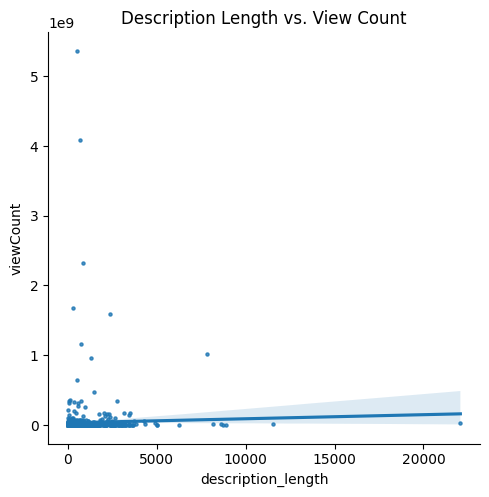

CORRELATION COEFFICIENT BETWEEN DESCRIPTION LENGTH AND VIEW COUNT ---------------------------
0.029618679083779707


In [ ]:
# plot the relationship between description length and viewCount
sns.lmplot(data=youtube, x='description_length', y='viewCount', scatter_kws={'s': 5})
plt.title('Description Length vs. View Count')
plt.show()

# print the correlation coefficient between description length and viewCount
print("CORRELATION COEFFICIENT BETWEEN DESCRIPTION LENGTH AND VIEW COUNT ---------------------------")
print(youtube['description_length'].corr(youtube['viewCount']))


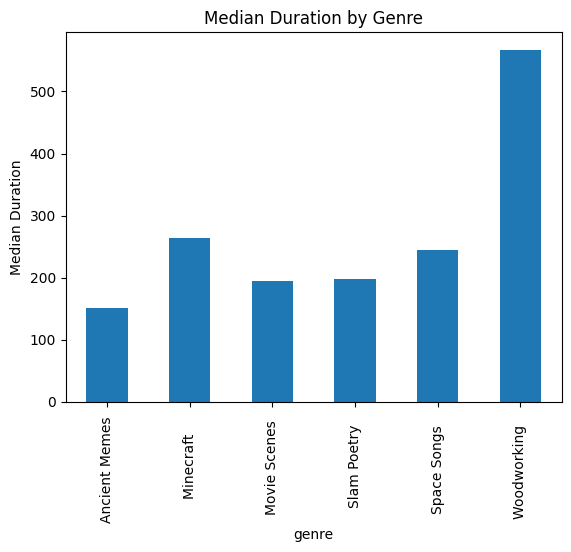

MEDIAN DURATION BY GENRE (IN SECONDS) --------------
genre
Woodworking       567.0
Minecraft         264.5
Space Songs       245.0
Slam Poetry       198.0
Movie Scenes      195.0
Ancient Memes     151.0
Name: duration, dtype: float64



In [ ]:
import pandas as pd
import isodate

youtube = pd.read_csv('youtube-data.csv')

# remove the white space in column names of youtube
youtube.columns = youtube.columns.str.strip()

# Remove white space in 'duration' column
youtube['duration'] = youtube['duration'].str.strip()

# Convert all rows in the 'duration' column to datestrings
youtube['duration'] = youtube['duration'].astype(str)

# Function to convert ISO 8601 duration to seconds
def convert_duration_to_seconds(duration):
    try:
        return int(isodate.parse_duration(duration).total_seconds())
    except isodate.ISO8601Error:
        print(f"Failed to parse duration: {duration}")
        return None

# Convert ISO 8601 duration to seconds in column 'duration'
youtube['duration'] = youtube['duration'].apply(convert_duration_to_seconds)

# Drop rows where conversion failed
youtube = youtube.dropna(subset=['duration'])

# Convert 'duration' column to int
youtube['duration'] = youtube['duration'].astype(int)

# graph the median duration by genre
youtube.groupby('genre')['duration'].median().plot(kind='bar')
plt.ylabel('Median Duration')
plt.title('Median Duration by Genre')
plt.show()

# for each genre, print the median duration in order of highest to lowest
print("MEDIAN DURATION BY GENRE (IN SECONDS) --------------")
print(youtube.groupby('genre')['duration'].median().sort_values(ascending=False))
print()

ValueError: could not convert string to float: '             '

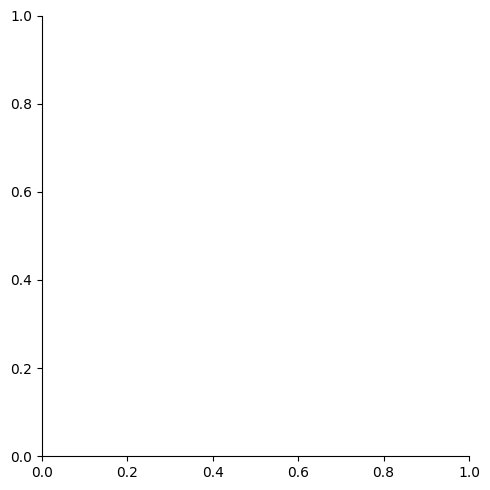

In [ ]:
# graph the relationship between duration and commentCount
sns.lmplot(data=youtube, x='duration', y='commentCount', scatter_kws={'s': 5})
plt.title('Duration vs. Comment Count')
plt.show()
